# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,39], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

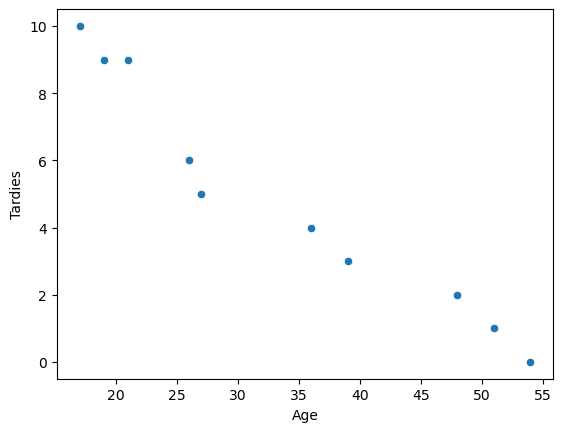

In [12]:
# Your code here.
sns.scatterplot(data=student_data, x='Age', y='Tardies')
plt.title('Age vs lateness')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
'''
There seems to be a negative between lateness and age

'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [15]:
# Your response here.
display(student_data.corr())
display(student_data.cov())


,Age,Tardies
Age,1.000000,-0.972382
Tardies,-0.972382,1.000000


,Age,Tardies
Age,189.955556,-47.466667
Tardies,-47.466667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [87]:
# Your response here.
import statsmodels.api as sm # or coukd use sklearn, but missing some features

x = sm.add_constant(student_data['Age'])
y= student_data['Tardies']                    # fit the regression model
model = sm.OLS(y, x) # ordinary least sqaure, function where modelling happens
results = model.fit()
prediction=results.predict(x)

# print the regression results
print(results.summary())
display(prediction)
'''linear regression,
outcome = lateness

model : y=-0.2499x+13.3460

R-squared shws that there is strong correlation

'''

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     138.9
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           2.46e-06
Time:                        17:36:24   Log-Likelihood:                -11.759
No. Observations:                  10   AIC:                             27.52
Df Residuals:                       8   BIC:                             28.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3460      0.768     17.366      0.0

C:\Users\gemma\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


0    9.098035
1    0.602012
2    6.599204
3    8.098503
4    4.350257
5    1.351661
6    8.598269
7    6.849088
8   -0.147637
9    3.600608
dtype: float64

'linear regression,\noutcome = lateness\n\nmodel : y=-0.2499x+13.3460\n\nR-squared shws that there is strong correlation\n\n'

Plot your regression model on your scatter plot.

(0.0, 10.0)

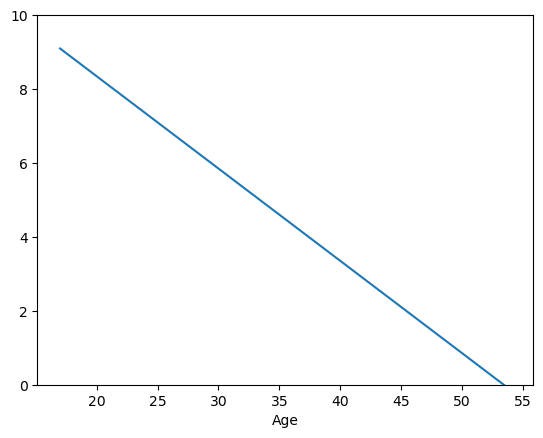

In [89]:
# Your code here.
np.random.seed(0)

#x = np.random.randint(18, 65, 10)

#y=(-0.2499*x)+13.3460

sns.lineplot(x=student_data['Age'],y=prediction)
plt.ylim(0,10)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
'''Apparently yes, howver model does not take into account you can't have negative absences '''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [3]:
# Import any libraries you may need & the data
df=pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

' most import fuel cost per year or combined MPG - essentially the same thing,\nleast useful = year\n'

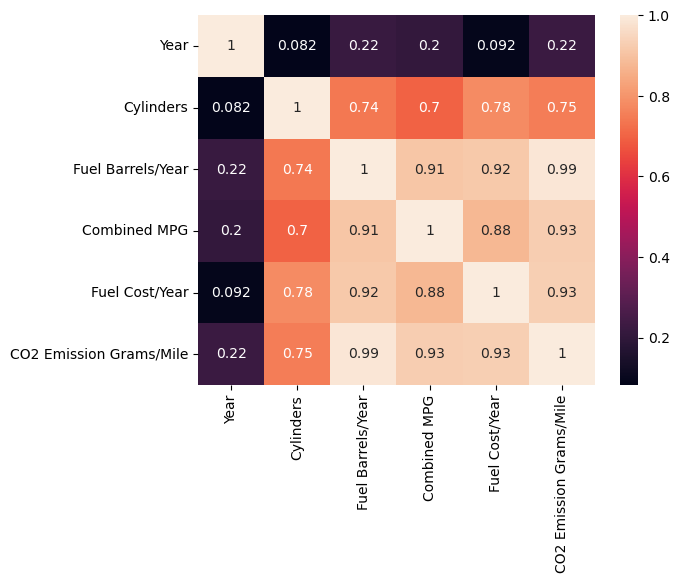

In [4]:
# Your response here. 
df.head()

df=df[['Year','Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile' ]]
sns.heatmap(np.abs(df.corr()), annot=True)

#can use just np.abs to see correlation, regardless of the negativ or positiveness of the correlation

''' most import fuel cost per year or combined MPG - essentially the same thing,
least useful = year
'''

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [96]:
# Your response here. 
from sklearn import linear_model as ln
x=df[['Year','Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y=df['CO2 Emission Grams/Mile']
length=len(x)
#x = x.reshape(length, 1)
#y = y.reshape(length, 1)

#testdata= [np.random.randint(3,8,50)
#testdata= testdata.reshape(len(testdata),1)

reg=ln.LinearRegression().fit(x,y)
prediction = reg.predict(x)
# cant plot multivariate
display(reg.coef_)
reg.intercept_



array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

769.8882836465739

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
'''multivariate linear regression'''

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [17]:
# Your code here. 
df=pd.DataFrame({'Invitees':[1,3,4,6,8,9,11,14], 'Attendees':[1,2,4,4,5,7,8,13]})
df

,Invitees,Attendees
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='Invitees', ylabel='Attendees'>

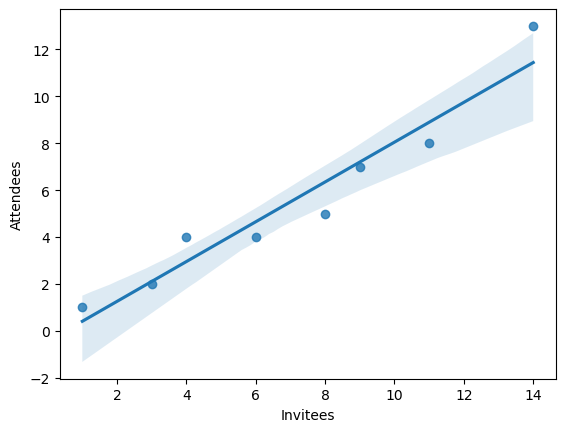

In [18]:
# Your code here.
sns.regplot(data=df,y='Attendees',x='Invitees')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 
'''
positive correlation between number of ppl invited and attendees'''

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

In [10]:
import scipy 

In [21]:
#Determine outlier based on z score
df[np.abs(scipy.stats.zscore(df['Attendees']) < 2)] 
# based on z score of 3 i would say there are no outliers, but in truth there is really not enough data to determine outlier
# if i lower the Z score it drops last point.


,Invitees,Attendees
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


(0.0, 14.0)

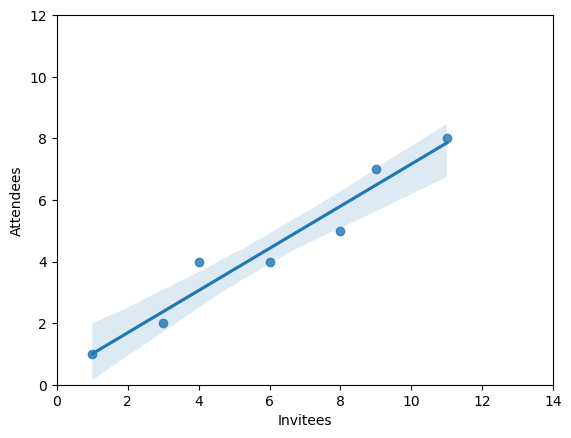

In [114]:
'''
lack of data between 11 and 14, so point 14'''
df=df.iloc[0:7,:]
sns.regplot(data=df,y='Attendees',x='Invitees')
plt.ylim(0,12)
plt.xlim(0,14)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
'''slope is slightly lower, the difference looks minimal'''